# EE4375-2022: Second Lab Session: Additions: Using DiffEqOperators 

## Running an Example

Here we reproduce the example given on https://diffeqoperators.sciml.ai/stable/operator_tutorials/kdv/. 

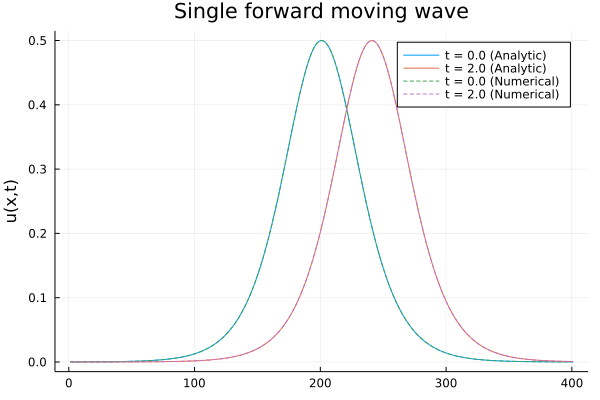

In [1]:
using Test
using DiffEqOperators, OrdinaryDiffEq, LinearAlgebra

# Space domain and grids
N = 21
Δx = 1/(N-1)
c = 1
x = -10:Δx:10;

# solution of the single forward moving wave
ϕ(x,t) = (1/2)*sech.((x .- t)/2).^2 

# Discretizing the PDE at t = 0
u0 = ϕ(x,0);
du = zeros(size(x)); 

# Declaring the Upwind operator with winding = -1 since the wave travels from left to right 
A = UpwindDifference{Float64}(1,3,Δx,length(x),-1);

# Defining the ODE problem
function KdV(du, u, p, t)
	bc = GeneralBC([0,1,-6*ϕ(-10,t),0,-1],[0,1,-6*ϕ(10,t),0,-1],Δx,3) 
	mul!(du,A,bc*u)
end

single_solition = ODEProblem(KdV, u0, (0.,5.));

# Solving the ODE problem 
soln = solve(single_solition,Tsit5(),abstol=1e-6,reltol=1e-6);

# Plotting the results, comparing Analytical and Numerical solutions 
using Plots
plot(ϕ(x,0), title  = "Single forward moving wave", yaxis="u(x,t)", label = "t = 0.0 (Analytic)")
plot!(ϕ(x,2), label = "t = 2.0 (Analytic)")
plot!(soln(0.0), label = "t = 0.0 (Numerical)",ls = :dash)
plot!(soln(2.0), label = "t = 2.0 (Numerical)",ls = :dash)

In [5]:
using Test
using DiffEqOperators, OrdinaryDiffEq, LinearAlgebra

# Space domain and grids
N = 4
Δx = 1/(N+1)
c = 1
x = 0:Δx:1;

# solution of the single forward moving wave
ϕ(x,t) = (1/2)*sech.((x .- t)/2).^2 

# Discretizing the PDE at t = 0
u0 = ϕ(x,0);
du = zeros(size(x)); 

# Declaring the Upwind operator with winding = -1 since the wave travels from left to right 
A = UpwindDifference{Float64}(1,3,Δx,length(x),-1);

print(A)
typeof(A)

DerivativeOperator{Float64, Float64, true, Float64, StaticArrays.SVector{4, Float64}, StaticArrays.SVector{2, StaticArrays.SVector{4, Float64}}, StaticArrays.SVector{2, StaticArrays.SVector{4, Float64}}, Vector{Float64}, Int64}(1, 3, 0.2, 6, 4, [-9.166666666666666, 15.0, -7.5, 1.6666666666666665], 4, 2, StaticArrays.SVector{4, Float64}[[-1.6666666666666665, -2.5, 4.999999999999999, -0.8333333333333333], [0.8333333333333333, -5.0, 2.5, 1.6666666666666665]], StaticArrays.SVector{4, Float64}[[-1.6666666666666665, -2.5, 4.999999999999999, -0.8333333333333333], [0.8333333333333333, -5.0, 2.5, 1.6666666666666665]], 0, [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0], -1)

DerivativeOperator{Float64, Float64, true, Float64, StaticArrays.SVector{4, Float64}, StaticArrays.SVector{2, StaticArrays.SVector{4, Float64}}, StaticArrays.SVector{2, StaticArrays.SVector{4, Float64}}, Vector{Float64}, Int64}